In [1]:
import pandas as pd
import altair as alt
from altair import *
import numpy as np

In [2]:
import pandas as pd
import glob

# Path to all sub.tsv files
sub_file_paths = glob.glob("/content/Metadata/sub*.tsv")  # Adjust folder path if needed

# Load and merge all sub.tsv files
df_all_sub = pd.concat([pd.read_csv(f, sep="\t", low_memory=False) for f in sub_file_paths])

# Display merged dataset
print("Total records in merged company metadata:", len(df_all_sub))
df_all_sub.head()

Total records in merged company metadata: 106477


,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,accepted,prevrpt,detail,instance,nciks,aciks,pubfloatusd,floatdate,floataxis,floatmems
0,0000003545-24-000127,3545,"ALICO, INC.",100.0,US,FL,"FT. MYERS,",33913,10070 DANIELS INTERSTATE COURT STE. 100,NaN,...,2024-12-02 07:13:00.0,0,0,alco-20241202_htm.xml,1,NaN,NaN,NaN,NaN,NaN
1,0000003545-24-000128,3545,"ALICO, INC.",100.0,US,FL,"FT. MYERS,",33913,10070 DANIELS INTERSTATE COURT STE. 100,NaN,...,2024-12-02 07:17:00.0,0,1,alco-20240930_htm.xml,1,NaN,206059142.0,20240331.0,NaN,1.0
2,0000052827-24-000208,52827,RAYONIER INC,6798.0,US,FL,WILDLIGHT,32097,1 RAYONIER WAY,NaN,...,2024-12-02 16:48:00.0,0,0,ryn-20241202_htm.xml,2,1806931,NaN,NaN,NaN,NaN
3,0000056978-24-000167,56978,KULICKE & SOFFA INDUSTRIES INC,3674.0,SG,NaN,SINGAPORE,554369,"23A SERANGOON NORTH AVENUE 5, #01-01",NaN,...,2024-12-02 09:12:00.0,0,0,klic-20241202_htm.xml,1,NaN,NaN,NaN,NaN,NaN
4,0000067215-24-000058,67215,DYCOM INDUSTRIES INC,1623.0,US,FL,PALM BEACH GARDENS,33408,11780 U.S. HIGHWAY 1,SUITE 600,...,2024-12-02 17:01:00.0,0,0,dy-20241130_htm.xml,1,NaN,NaN,NaN,NaN,NaN


In [3]:
# Path to all num.tsv files
num_file_paths = glob.glob("/content/Financial Data/num*.tsv")  # Adjust folder path if needed

# Load and merge all num.tsv files
df_all_num = pd.concat([pd.read_csv(f, sep="\t", low_memory=False) for f in num_file_paths])

# Display merged dataset
print("Total records in merged financial data:", len(df_all_num))
df_all_num.head()

Total records in merged financial data: 33316216


,adsh,tag,version,ddate,qtrs,uom,dimh,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml
0,0000014707-24-000041,AccountsPayableSubjectToSupplyChainFinancingAr...,0000014707-24-000041,20230731,0,USD,0x00000000,0,32900000.0,NaN,0,0,NaN,0.0,2.0,-5
1,0000014707-24-000041,AccountsPayableSubjectToSupplyChainFinancingAr...,0000014707-24-000041,20240731,0,USD,0x00000000,0,15800000.0,NaN,0,0,NaN,0.0,-3.0,-5
2,0000014707-24-000041,AccountsPayableTradeCurrent,us-gaap/2024,20230731,0,USD,0x00000000,0,350020000.0,NaN,0,0,NaN,0.0,2.0,-3
3,0000014707-24-000041,AccountsPayableTradeCurrent,us-gaap/2024,20240131,0,USD,0x00000000,0,251912000.0,NaN,0,0,NaN,0.0,-3.0,-3
4,0000014707-24-000041,AccountsPayableTradeCurrent,us-gaap/2024,20240731,0,USD,0x00000000,0,396450000.0,NaN,0,0,NaN,0.0,-3.0,-3


# SEC Filings Dataset - Column Details

## **Company & Identifier Information**
- **`adsh`**: Accession number (unique identifier for SEC filing).
- **`cik`**: Central Index Key (SEC identifier for companies).
- **`name`**: Company name.
- **`sic`**: Standard Industrial Classification (Industry category).

## **Location & Contact Information**
- **`countryba`**: Country of business address.
- **`stprba`**: State/province of business address.
- **`cityba`**: City of business address.
- **`zipba`**: Zip code of business address.
- **`bas1`**: Primary business address line 1.
- **`bas2`**: Primary business address line 2.

## **Filing & Reporting Information**
- **`form`**: SEC form type (e.g., 10-Q, 10-K, 8-K).
- **`period`**: Financial reporting period (e.g., 20241231).
- **`fy`**: Fiscal year (e.g., 2024).
- **`fp`**: Fiscal period (e.g., Q3 for third quarter).
- **`filed`**: Date the report was filed with the SEC.
- **`accepted`**: Date the report was accepted by the SEC.
- **`filing_delay_days`**: Computed column – difference between `accepted` and `filed`.

## **Additional Metadata**
- **`prevrpt`**: Indicates whether it is a previous report (1 = Yes, 0 = No).
- **`detail`**: Indicator for detailed filing.
- **`instance`**: XML file reference for the SEC submission.
- **`nciks`**: Number of CIKs reported in the filing.
- **`aciks`**: Additional CIKs related to the filing.
- **`pubfloatusd`**: Public float (market value of publicly traded shares).
- **`floatdate`**: Date of public float measurement.
- **`floataxis`**: Axis reference for float data.
- **`floatmems`**: Members or segments of float data.

# Exploratory Data Analysis (EDA)

### Which industries file the most reports?

In [4]:
industry_counts = df_all_sub['sic'].value_counts().head(10)
industry_counts

,count
sic,
2834.0,10709
6798.0,4699
7372.0,3931
6022.0,3615
2836.0,3484
6770.0,2994
3841.0,2902
6021.0,1888
7389.0,1760


In [5]:
# Convert 'filed' and 'accepted' columns to datetime objects
df_all_sub['filed'] = pd.to_datetime(df_all_sub['filed'])
df_all_sub['accepted'] = pd.to_datetime(df_all_sub['accepted'])

# Calculate filing delay in days
df_all_sub['filing_delay_days'] = (df_all_sub['accepted'] - df_all_sub['filed']).dt.days

# Display the first few rows to verify the calculation
df_all_sub[['filed', 'accepted', 'filing_delay_days']].head()


,filed,accepted,filing_delay_days
0,1970-01-01 00:00:00.020241202,2024-12-02 07:13:00,20059
1,1970-01-01 00:00:00.020241202,2024-12-02 07:17:00,20059
2,1970-01-01 00:00:00.020241202,2024-12-02 16:48:00,20059
3,1970-01-01 00:00:00.020241202,2024-12-02 09:12:00,20059
4,1970-01-01 00:00:00.020241202,2024-12-02 17:01:00,20059


### Filing Delay Analysis

In [6]:
avg_filing_delay = df_all_sub.groupby('sic')['filing_delay_days'].mean().sort_values(ascending=False)
avg_filing_delay.head(10)

,filing_delay_days
sic,
2390.0,19996.300000
2020.0,19990.272727
4220.0,19969.307692
3652.0,19965.575758
3330.0,19961.761905
2520.0,19954.400000
3716.0,19941.033333
2741.0,19937.625000
8093.0,19936.613333


### Which SEC forms are most frequently filed?

In [7]:
form_counts = df_all_sub['form'].value_counts()
form_counts.head(10)

,count
form,
8-K,70443
10-Q,17449
10-K,5886
DEF 14A,2748
8-K/A,1604
N-CSRS,1022
20-F,1009
10-K/A,850
N-CSR,713


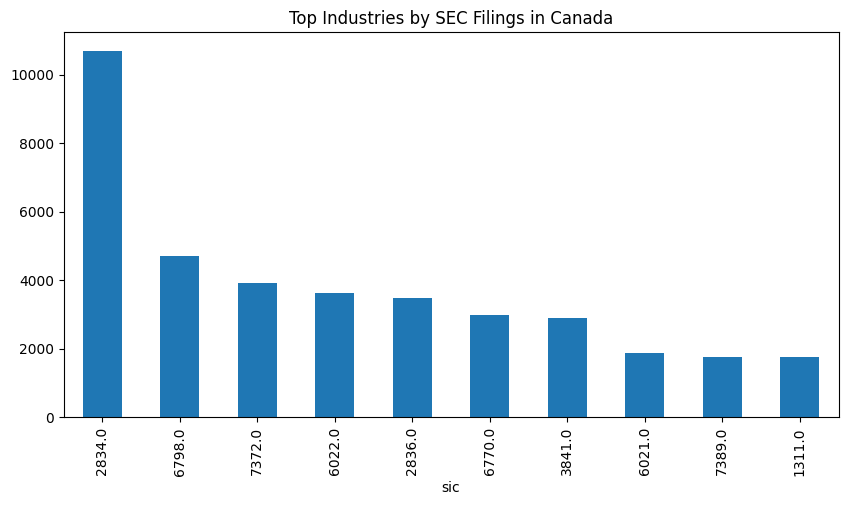

In [8]:
import matplotlib.pyplot as plt

# Top industries by filings
plt.figure(figsize=(10,5))
industry_counts.plot(kind='bar', title="Top Industries by SEC Filings in Canada")
plt.show()

### Filter Data for Apple & Microsoft

Apple Inc.
CIK Code: 320193

Microsoft Corp.
CIK Code: 789019

In [9]:
# Select Apple & Microsoft using their CIK codes
selected_ciks = [320193, 789019]
df_selected_companies = df_all_sub[df_all_sub['cik'].isin(selected_ciks)]

# Match with financial data using 'adsh' (SEC filing ID)
df_selected_financials = df_all_num[df_all_num['adsh'].isin(df_selected_companies['adsh'])]


In [10]:
# Display results
#Filtered Company Metadata
df_selected_companies.head()

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,prevrpt,detail,instance,nciks,aciks,pubfloatusd,floatdate,floataxis,floatmems,filing_delay_days
238,0000950170-24-132722,789019,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,...,0,1,msft-20241203_htm.xml,1,NaN,NaN,NaN,NaN,NaN,20060
1975,0001193125-24-275524,789019,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,...,0,0,d865252d8k_htm.xml,1,NaN,NaN,NaN,NaN,NaN,20068
77,0000320193-24-000080,320193,APPLE INC,3571.0,US,CA,CUPERTINO,95014,ONE APPLE PARK WAY,NaN,...,0,0,aapl-20240801_htm.xml,1,NaN,NaN,NaN,NaN,NaN,19936
987,0000320193-24-000081,320193,APPLE INC,3571.0,US,CA,CUPERTINO,95014,ONE APPLE PARK WAY,NaN,...,0,1,aapl-20240629_htm.xml,1,NaN,NaN,NaN,NaN,NaN,19936
9799,0001193125-24-204403,789019,MICROSOFT CORP,7372.0,US,WA,REDMOND,98052-6399,ONE MICROSOFT WAY,NaN,...,0,0,d846847d8k_htm.xml,1,NaN,NaN,NaN,NaN,NaN,19956


In [11]:
#Filtered Financial Data
df_selected_financials.head()

,adsh,tag,version,ddate,qtrs,uom,dimh,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml
337,0000950170-24-118967,FiniteLivedIntangibleAssetsGross,us-gaap/2024,20240630,0,USD,0xf2f5f792ae80ee0a529b9499095c97ca,0,1.650000e+10,NaN,0,1,NaN,0.0,0.0,-6
480,0000950170-24-118967,CashCashEquivalentsRestrictedCashAndRestricted...,us-gaap/2024,20240630,0,USD,0x00000000,0,1.831500e+10,NaN,0,0,NaN,0.0,0.0,-6
1213,0000950170-24-118967,CashAndCashEquivalentsAtCarryingValue,us-gaap/2024,20240630,0,USD,0xfb4a85c884f196b610bd6b58550c8370,0,0.000000e+00,NaN,0,3,NaN,0.0,0.0,-6
2024,0000950170-24-118967,DebtInstrumentInterestRateEffectivePercentage,us-gaap/2024,20240930,0,pure,0xa030d476475de310f59a705cb9a39c9b,0,5.490000e-02,NaN,0,2,NaN,0.0,0.0,32767
2439,0000950170-24-118967,EquitySecuritiesFVNINoncurrent,us-gaap/2024,20240930,0,USD,0x4ac6c8ca6e0d67e75aab90ef6627f775,0,1.516200e+10,NaN,0,1,NaN,0.0,0.0,-6


In [12]:
# Define key financial metrics
financial_tags = ["RevenueFromContractWithCustomerExcludingAssessedTax", "NetIncomeLoss", "Assets", "Liabilities"]

# Filter financial data for selected metrics
df_financials_filtered = df_selected_financials[df_selected_financials['tag'].isin(financial_tags)]


In [13]:
# Convert date column to datetime format
df_financials_filtered['ddate'] = pd.to_datetime(df_financials_filtered['ddate'], format='%Y%m%d')

# Display results
df_financials_filtered.head()

<ipython-input-13-613f41f8bbc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financials_filtered['ddate'] = pd.to_datetime(df_financials_filtered['ddate'], format='%Y%m%d')


,adsh,tag,version,ddate,qtrs,uom,dimh,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml
6354,0000950170-24-118967,NetIncomeLoss,us-gaap/2024,2024-09-30,1,USD,0x00000000,0,2.466700e+10,NaN,0,0,NaN,0.00274,0.0,-6
12213,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x62b87b637d4ff762aa6b5ba1cb238aa8,0,1.317600e+10,NaN,0,1,NaN,0.00274,0.0,-6
34282,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2023-09-30,1,USD,0x6a38719a1a103b653baa823273f460c8,0,2.881200e+10,Includes billings to OEMs and certain multinat...,185,1,NaN,0.00274,0.0,-6
79320,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2023-09-30,1,USD,0x6c1d4cf0bf6f75f0126358d1220b6dba,0,2.770500e+10,NaN,0,1,NaN,0.00274,0.0,-6
91395,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2023-09-30,1,USD,0x00000000,3,5.651700e+10,NaN,0,0,NaN,0.00274,0.0,-6


## Check Available Time Periods

In [14]:
# Count unique time periods
num_periods = df_financials_filtered['ddate'].nunique()
date_range = (df_financials_filtered['ddate'].min(), df_financials_filtered['ddate'].max())

print(f"Number of time periods available: {num_periods}")
print(f"Date range: {date_range}")

Number of time periods available: 13
Date range: (Timestamp('2021-06-30 00:00:00'), Timestamp('2024-12-31 00:00:00'))


### Quarter-over-Quarter Growth

> 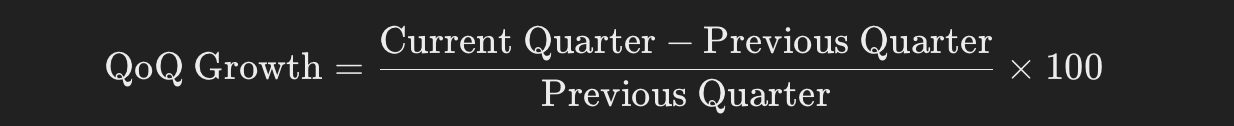





In [15]:
# Sort data by date
df_financials_filtered = df_financials_filtered.sort_values(by=['ddate'])

In [16]:
# Calculate QoQ Growth for Revenue
df_financials_filtered['QoQ_Growth'] = df_financials_filtered.groupby(['adsh', 'tag'])['value'].pct_change() * 100

In [17]:
# Identify latest vs. previous quarter
latest_quarter = df_financials_filtered['ddate'].max()
previous_quarter = latest_quarter - pd.DateOffset(months=3)

print("Latest Quarter:", latest_quarter)
print("Previous Quarter:", previous_quarter)

Latest Quarter: 2024-12-31 00:00:00
Previous Quarter: 2024-09-30 00:00:00


In [18]:
# Compare Apple vs. Microsoft revenue trends
df_qoq = df_financials_filtered[df_financials_filtered['ddate'].isin([previous_quarter, latest_quarter])]

In [19]:
# Display quarter-over-quarter growth
df_qoq.head()

,adsh,tag,version,ddate,qtrs,uom,dimh,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml,QoQ_Growth
6354,0000950170-24-118967,NetIncomeLoss,us-gaap/2024,2024-09-30,1,USD,0x00000000,0,2.466700e+10,NaN,0,0,NaN,0.00274,0.0,-6,10.659010
1154599,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x011a26defb2e79c047125f4bba99b5ec,0,4.329000e+09,NaN,0,1,NaN,0.00274,0.0,-6,-82.839134
1470090,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x94c1611529456c7cf3987f92ddf02327,0,1.527200e+10,NaN,0,1,NaN,0.00274,0.0,-6,252.783553
1502475,0000950170-24-118967,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x00000000,0,6.558500e+10,NaN,0,0,NaN,0.00274,0.0,-6,329.446045
1539948,0000950170-24-118967,Liabilities,us-gaap/2024,2024-09-30,0,USD,0x00000000,0,2.352900e+11,NaN,0,0,NaN,0.00000,0.0,-6,-3.445417


## Identify Companies with Strongest Growth

In [20]:
# Create a dictionary mapping adsh to company names
adsh_to_company = df_selected_companies.set_index('adsh')['name'].to_dict()

# Replace adsh numbers with company names
df_qoq['Company'] = df_qoq['adsh'].map(adsh_to_company)

# Drop original adsh column (optional)
df_qoq.drop(columns=['adsh'], inplace=True)

# Display updated dataset
df_qoq

<ipython-input-20-64377ff78794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qoq['Company'] = df_qoq['adsh'].map(adsh_to_company)
<ipython-input-20-64377ff78794>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qoq.drop(columns=['adsh'], inplace=True)


,tag,version,ddate,qtrs,uom,dimh,iprx,value,footnote,footlen,dimn,coreg,durp,datp,dcml,QoQ_Growth,Company
6354,NetIncomeLoss,us-gaap/2024,2024-09-30,1,USD,0x00000000,0,2.466700e+10,NaN,0,0,NaN,0.002740,0.0,-6,10.659010,MICROSOFT CORP
1154599,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x011a26defb2e79c047125f4bba99b5ec,0,4.329000e+09,NaN,0,1,NaN,0.002740,0.0,-6,-82.839134,MICROSOFT CORP
1470090,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x94c1611529456c7cf3987f92ddf02327,0,1.527200e+10,NaN,0,1,NaN,0.002740,0.0,-6,252.783553,MICROSOFT CORP
1502475,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-09-30,1,USD,0x00000000,0,6.558500e+10,NaN,0,0,NaN,0.002740,0.0,-6,329.446045,MICROSOFT CORP
1539948,Liabilities,us-gaap/2024,2024-09-30,0,USD,0x00000000,0,2.352900e+11,NaN,0,0,NaN,0.000000,0.0,-6,-3.445417,MICROSOFT CORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32734,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-12-31,1,USD,0x94c1611529456c7cf3987f92ddf02327,0,9.796000e+10,NaN,0,1,NaN,0.013699,3.0,-6,189.300375,APPLE INC
32735,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-12-31,1,USD,0xc96c0875674032350ea40db9187c510c,0,1.029100e+10,NaN,0,1,NaN,0.013699,3.0,-6,-89.494692,APPLE INC
32736,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-12-31,1,USD,0xd632786237eef3c111693625b4919da3,0,1.174700e+10,NaN,0,1,NaN,0.013699,3.0,-6,14.148285,APPLE INC
32729,RevenueFromContractWithCustomerExcludingAssess...,us-gaap/2024,2024-12-31,1,USD,0x069a88922f44e2a635e62c561fb3adcc,0,8.088000e+09,NaN,0,1,NaN,0.013699,3.0,-6,-31.148378,APPLE INC


In [21]:
# Pivot after aggregation
df_comparison = df_qoq.pivot_table(index='Company', columns=['ddate', 'tag'], values='QoQ_Growth', aggfunc='mean')

# Rename columns for clarity
df_comparison.columns = [f"{col[0]}_{col[1]}" for col in df_comparison.columns]

# Display results
print("Apple vs. Microsoft QoQ Growth Comparison:")
df_comparison = df_comparison.reset_index()
df_comparison

Apple vs. Microsoft QoQ Growth Comparison:


,Company,2024-09-30 00:00:00_Assets,2024-09-30 00:00:00_Liabilities,2024-09-30 00:00:00_NetIncomeLoss,2024-09-30 00:00:00_RevenueFromContractWithCustomerExcludingAssessedTax,2024-12-31 00:00:00_Assets,2024-12-31 00:00:00_Liabilities,2024-12-31 00:00:00_NetIncomeLoss,2024-12-31 00:00:00_RevenueFromContractWithCustomerExcludingAssessedTax
0,APPLE INC,3.516052,6.057424,-1.113344,94.275784,-5.724971,-9.967536,1.423517,117.268631
1,MICROSOFT CORP,2.118466,-3.445417,2.131802,6324.028999,4.243766,-5.122576,6.197889,10153.835857


In [22]:
# Set 'Company' as index for easier plotting
df_plot = df_comparison.set_index("Company").T  # Transpose to make dates rows

# Extract dates from column names (split on '_')
df_plot['Date'] = df_plot.index.str.split('_').str[0]
df_plot['Metric'] = df_plot.index.str.split('_').str[1]

# Convert 'Date' to datetime
df_plot['Date'] = pd.to_datetime(df_plot['Date'])

# Reset index
df_plot = df_plot.reset_index(drop=True)

# Display structure
print("Reshaped Data for Plotting:")
df_plot

Reshaped Data for Plotting:


Company,APPLE INC,MICROSOFT CORP,Date,Metric
0,3.516052,2.118466,2024-09-30,Assets
1,6.057424,-3.445417,2024-09-30,Liabilities
2,-1.113344,2.131802,2024-09-30,NetIncomeLoss
3,94.275784,6324.028999,2024-09-30,RevenueFromContractWithCustomerExcludingAssess...
4,-5.724971,4.243766,2024-12-31,Assets
5,-9.967536,-5.122576,2024-12-31,Liabilities
6,1.423517,6.197889,2024-12-31,NetIncomeLoss
7,117.268631,10153.835857,2024-12-31,RevenueFromContractWithCustomerExcludingAssess...


In [23]:
import matplotlib.pyplot as plt

# Filter only Revenue Growth data
df_revenue_growth = df_plot[df_plot['Metric'] == "RevenueFromContractWithCustomerExcludingAssessedTax"]

df_revenue_growth

Company,APPLE INC,MICROSOFT CORP,Date,Metric
3,94.275784,6324.028999,2024-09-30,RevenueFromContractWithCustomerExcludingAssess...
7,117.268631,10153.835857,2024-12-31,RevenueFromContractWithCustomerExcludingAssess...


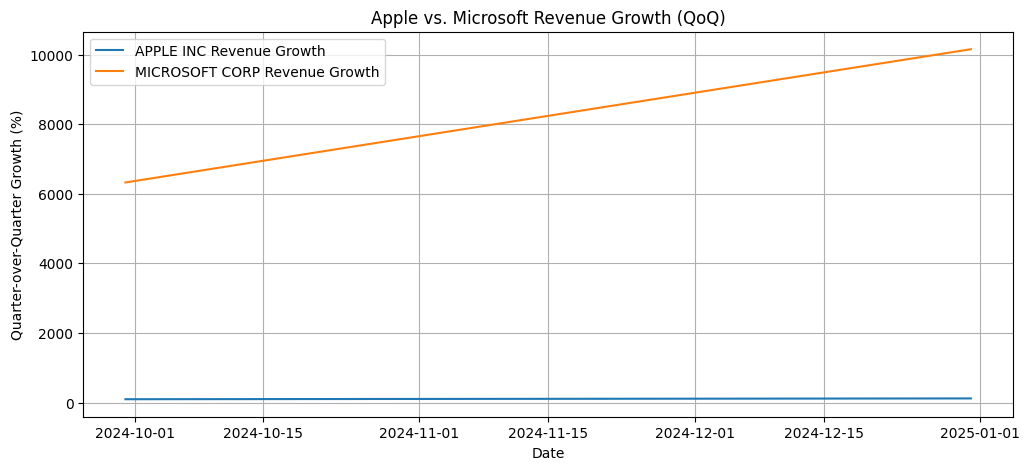

In [24]:
# Initialize figure
plt.figure(figsize=(12,5))

# Plot for each company
for company in df_comparison['Company']:
    plt.plot(df_revenue_growth['Date'], df_revenue_growth[company], label=f"{company} Revenue Growth")

# Customize plot
plt.legend()
plt.title("Apple vs. Microsoft Revenue Growth (QoQ)")
plt.xlabel("Date")
plt.ylabel("Quarter-over-Quarter Growth (%)")
plt.grid(True)
plt.show()

# Forecast Future Revenue

## Using time-series forecasting, we will predict Apple & Microsoft’s next quarter revenue.

In [25]:
# Filter for revenue data only
df_forecast = df_financials_filtered[df_financials_filtered['tag'] == 'RevenueFromContractWithCustomerExcludingAssessedTax']

# Replace adsh numbers with company names
df_forecast['Company'] = df_forecast['adsh'].map(adsh_to_company)

# Drop original adsh column (optional)
df_forecast.drop(columns=['adsh'], inplace=True)

# Aggregate revenue per quarter
df_forecast = df_forecast.groupby(['ddate', 'Company'])['value'].sum().reset_index()

# Convert date to proper format
df_forecast['ddate'] = pd.to_datetime(df_forecast['ddate'])

# Pivot so each company has its own column
df_forecast_pivot = df_forecast.pivot(index='ddate', columns='Company', values='value')

# Display processed data
print("Processed Revenue Data for Forecasting:")
df_forecast_pivot

Processed Revenue Data for Forecasting:


<ipython-input-25-239b110595e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast['Company'] = df_forecast['adsh'].map(adsh_to_company)
<ipython-input-25-239b110595e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast.drop(columns=['adsh'], inplace=True)


Company,APPLE INC,MICROSOFT CORP
ddate,,
2022-06-30,NaN,3.355120e+12
2022-09-30,2.760296e+12,NaN
2022-12-31,5.857700e+11,1.324828e+12
2023-03-31,1.534130e+12,1.778464e+12
2023-06-30,1.877920e+12,3.613840e+12
2023-09-30,2.682995e+12,4.840360e+11
2023-12-31,1.195750e+12,3.087412e+12
2024-03-31,1.505405e+12,2.073724e+12
2024-06-30,1.909410e+12,4.197052e+12


In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Define forecast period (next 4 quarters)
forecast_periods = 4

# Initialize figure
plt.figure(figsize=(12,5))

# Define ARIMA order (p,d,q) - Can be tuned based on model performance
order = (2,1,2)

# Forecast for each company
for company in df_forecast_pivot.columns:
    model = ARIMA(df_forecast_pivot[company], order=order)
    fit = model.fit()

    # Predict next 4 quarters
    forecast = fit.forecast(steps=forecast_periods)

    # Print forecasted values
    print(f"Forecasted Revenue for {company}:\n", forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Forecasted Revenue for APPLE INC:
 2025-03-31    1.420179e+12
2025-06-30    3.057021e+12
2025-09-30    1.659401e+12
2025-12-31    5.339765e+11
Freq: QE-DEC, Name: predicted_mean, dtype: float64
Forecasted Revenue for MICROSOFT CORP:
 2025-03-31    2.693529e+12
2025-06-30    2.021786e+12
2025-09-30    2.030034e+12
2025-12-31    2.092612e+12
Freq: QE-DEC, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

<Figure size 1200x500 with 0 Axes>